<a href="https://colab.research.google.com/github/Vijayarengan27/Data_Columns_Relationship/blob/main/Data_relationship_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
class Variable_Relationship:

  def __init__(self,data):
    self.data = data
    self.int_cols = [c for c in self.data.columns if self.data[c].dtype != 'object']
    self.cat_cols = []

  def get_correlation_matrix(self):  # returns a plot of correlation matrix and the correlation matrix for the numerical columns of the data

    data_int = self.data[self.int_cols]

    if data_int.isnull().values.any():
      for col in self.int_cols:
        data_int.loc[data_int[col].isnull(),col] = data_int[col].mean().astype(data_int[col].dtype)

    X_arr = np.array(data_int)
    pearson_corrcoef_num = (X_arr - np.mean(X_arr, axis = 0)).T .dot(X_arr - np.mean(X_arr, axis = 0))
    pearson_corrcoef_den = np.sqrt(np.sum((X_arr - np.mean(X_arr, axis = 0))**2 , axis = 0,keepdims = True)).T.dot(np.sqrt(np.sum((X_arr - np.mean(X_arr, axis = 0))**2 , axis = 0,keepdims = True)))
    pearson_corrcoef = pearson_corrcoef_num/pearson_corrcoef_den

    mat = pd.DataFrame(pearson_corrcoef)
    mat.columns = self.int_cols
    mat.index = self.int_cols

    plt.figure(figsize = (7,7))
    sns.heatmap(mat,annot = True, fmt = '.3f',cmap = 'OrRd', cbar = False, vmax = 1, vmin = -1)
    plt.show()

    return mat

  def get_covariance_matrix(self):  # returns the covariance matrix of the numerical columns for the given data

    data_int = self.data[self.int_cols]

    if data_int.isnull().values.any():
      for col in self.int_cols:
        data_int.loc[data_int[col].isnull(),col] = data_int[col].mean().astype(data_int[col].dtype)

    X_arr = np.array(data_int)
    variance_metric = (X_arr - np.mean(X_arr, axis = 0)).T .dot(X_arr - np.mean(X_arr, axis = 0))/(X_arr.shape[0] - 1)

    mat = pd.DataFrame(variance_metric)
    mat.columns = self.int_cols
    mat.index = self.int_cols

    return mat







Example dataset:

In [3]:
df = pd.read_csv('/content/fortune1000_2024.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Ticker                         959 non-null    object 
 3   Sector                         1000 non-null   object 
 4   Industry                       1000 non-null   object 
 5   Profitable                     1000 non-null   object 
 6   Founder_is_CEO                 1000 non-null   object 
 7   FemaleCEO                      1000 non-null   object 
 8   Growth_in_Jobs                 1000 non-null   object 
 9   Change_in_Rank                 1000 non-null   float64
 10  Gained_in_Rank                 1000 non-null   object 
 11  Dropped_in_Rank                1000 non-null   object 
 12  Newcomer_to_the_Fortune500     500 non-null    ob

In [5]:
df = df.drop(['Rank','Change_in_Rank', 'Number_of_employees'],axis = 1)

In [9]:
metrics = Variable_Relationship(df)

<ipython-input-8-d72b4f8bd1e9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_int.loc[data_int[col].isnull(),col] = data_int[col].mean().astype(data_int[col].dtype)


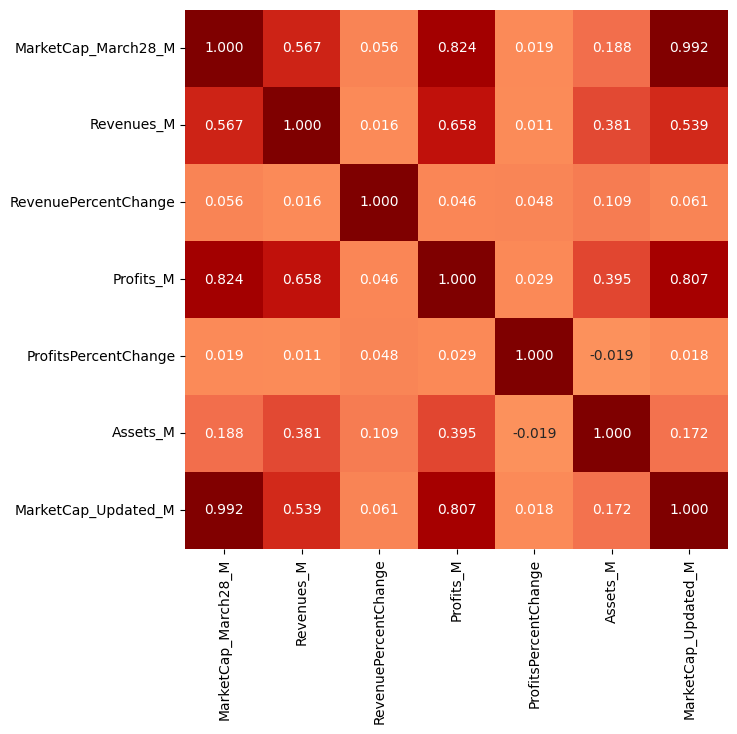

,MarketCap_March28_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M
MarketCap_March28_M,1.000000,0.567114,0.055583,0.823723,0.018710,0.187533,0.991515
Revenues_M,0.567114,1.000000,0.016326,0.657949,0.010591,0.380842,0.538680
RevenuePercentChange,0.055583,0.016326,1.000000,0.045788,0.047856,0.108573,0.060703
Profits_M,0.823723,0.657949,0.045788,1.000000,0.028644,0.395305,0.806981
ProfitsPercentChange,0.018710,0.010591,0.047856,0.028644,1.000000,-0.018965,0.017501
Assets_M,0.187533,0.380842,0.108573,0.395305,-0.018965,1.000000,0.171505
MarketCap_Updated_M,0.991515,0.538680,0.060703,0.806981,0.017501,0.171505,1.000000


In [10]:
metrics.get_correlation_matrix()

In [11]:
metrics.get_covariance_matrix()

<ipython-input-8-d72b4f8bd1e9>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_int.loc[data_int[col].isnull(),col] = data_int[col].mean().astype(data_int[col].dtype)


,MarketCap_March28_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M
MarketCap_March28_M,3.511494e+10,5.163653e+09,3.626054e+05,1.025431e+09,3.033715e+06,9.563996e+09,4.180138e+10
Revenues_M,5.163653e+09,2.360921e+09,2.761718e+04,2.123792e+08,4.452609e+05,5.036195e+09,5.888662e+09
RevenuePercentChange,3.626054e+05,2.761718e+04,1.211980e+03,1.058952e+04,1.441597e+03,1.028698e+06,4.754452e+05
Profits_M,1.025431e+09,2.123792e+08,1.058952e+04,4.413248e+07,1.646506e+05,7.147067e+08,1.206113e+09
ProfitsPercentChange,3.033715e+06,4.452609e+05,1.441597e+03,1.646506e+05,7.487074e+05,-4.466123e+06,3.406915e+06
Assets_M,9.563996e+09,5.036195e+09,1.028698e+06,7.147067e+08,-4.466123e+06,7.406842e+10,1.050118e+10
MarketCap_Updated_M,4.180138e+10,5.888662e+09,4.754452e+05,1.206113e+09,3.406915e+06,1.050118e+10,5.061632e+10
